# Load and Visualize the Data

<Figure size 500x1500 with 0 Axes>

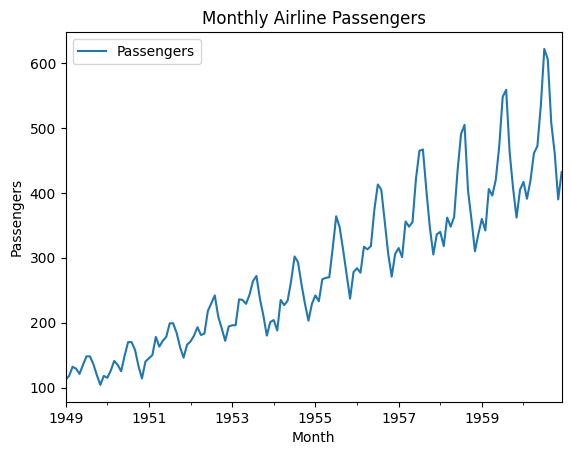

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Plot the time series
plt.figure(figsize=(5, 15))
df.plot(title='Monthly Airline Passengers')
plt.ylabel('Passengers')
plt.show()

# Make the series stationary (constant mean and variance)

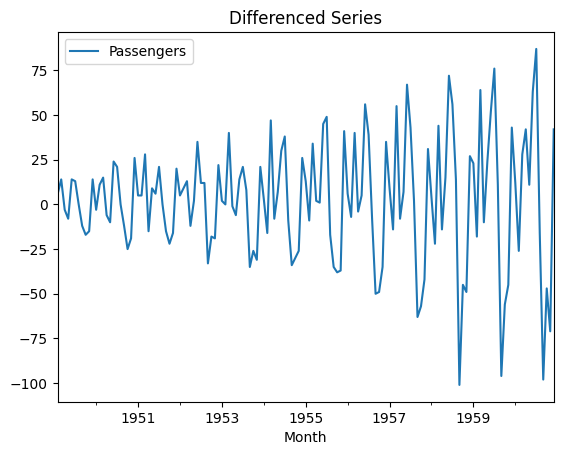

In [2]:
# First difference
diff = df.diff().dropna()

# Plot differenced series
diff.plot(title='Differenced Series')
plt.show()


We can also test for stationarity using the Augmented Dickey-Fuller test:

In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(diff['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


# Identify ARIMA Parameters $(p, d, q)$

* $p$: Number of lags in PACF before it drops off
* $q$: Number of lags in ACF before it drops off
* $d$: Number of differences (we used 1)

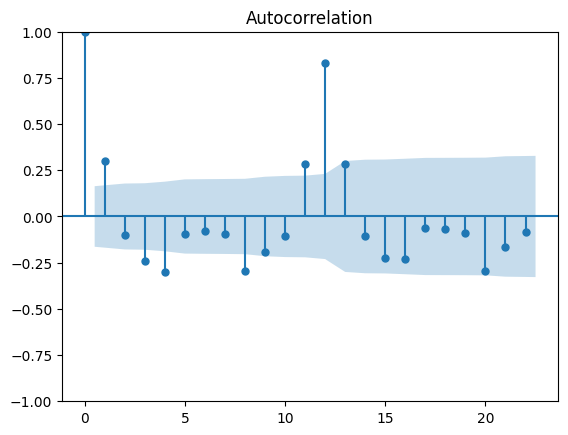

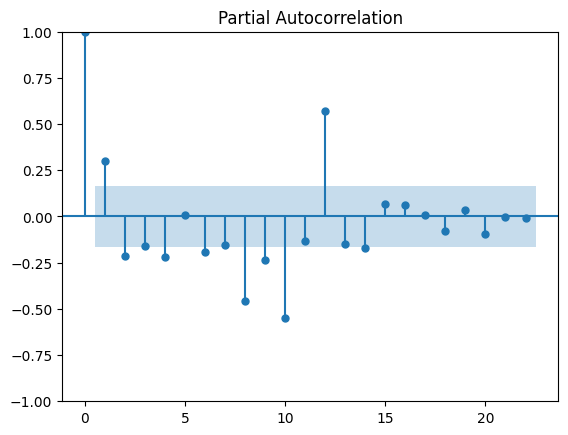

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(diff)
plot_pacf(diff)
plt.show()

# Fit the ARIMA model

In [5]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(2, 1, 2))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 08 Jul 2025   AIC                           1353.347
Time:                        12:44:42   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.814      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Forecast and Plot

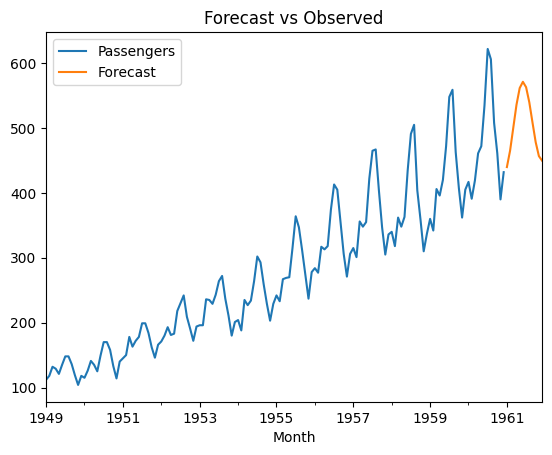

In [6]:
# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

# Plot
df.plot(label='Observed')
forecast.plot(label='Forecast', legend=True)
plt.title('Forecast vs Observed')
plt.show()


# AutoArima: automatic parameter selection

In [7]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df, seasonal=False, trace=True)
print(stepwise_model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject